<a href="https://colab.research.google.com/github/Zhaoxin-Hu/ECE222A/blob/master/Homework%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 3

In [0]:
import matplotlib
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d

Define unnormalized and normalized pattern function <br/>
- unnormalized: $P_{un}(\theta,\phi) = \frac{\sin^2\frac{M}{2}(kd_x\sin\theta\cos\phi+\alpha_x)}{\sin^2\frac{1}{2}(kd_x\sin\theta\cos\phi+\alpha_x)} \frac{\sin^2\frac{N}{2}(kd_x\sin\theta\sin\phi+\alpha_y)}{\sin^2\frac{1}{2}(kd_x\sin\theta\sin\phi+\alpha_y)}$ <br/>
- normalized: $P_n(\theta,\phi) = \frac{P_{un}}{P_{un,max}}$

In [0]:
theta, phi = np.linspace(0, np.pi, 100)[1:-1], np.linspace(0, 2*np.pi, 40)
theta2d, phi2d = np.meshgrid(theta, phi)
M = 16
N = 16
kdx = np.pi
kdy = 1.2*np.pi
kdz = np.pi
ax = 0
ay = 0
az = 0

In [0]:
def P_un(theta, phi):
    psi = kdz*np.cos(theta)+az
    m = np.arange(M)
    P = np.sum(np.exp(1j*m*psi))
    return np.abs(P)


ValueError: ignored

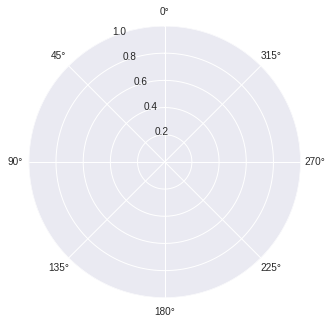

In [15]:
plt.figure(figsize = (5,5))
ax = plt.subplot(111, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.plot(theta, 10*np.log10(P_un(theta, 0)))
ax.set_rmax(0)
ax.set_rmin(-30)
ax.set_title(r'E-plane Pattern (dB angular plot)', y=1.2)
ax.set_xlabel(r'$\theta$')

In [9]:
np.arange(M)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [0]:
def P_un(theta, phi):
    psix = kdx*np.sin(theta)*np.cos(phi)+ax
    psiy = kdy*np.sin(theta)*np.sin(phi)+ay
    return (np.sin(M/2*psix)*np.sin(N/2*psiy)/np.sin(1/2*psix)/np.sin(1/2*psiy))**2
Pat_un = np.nan_to_num(P_un(theta2d,phi2d))
P_un_max = np.max(Pat_un)
def P_n(theta, phi):
    return P_un(theta, phi)/P_un_max
def integrand(theta, phi):
    return P_n(theta, phi)*np.sin(theta)

/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


In [0]:
print(Pat_un)

[[    0.             0.             0.         ...     0.
      0.             0.        ]
 [52701.11980821 25739.11555077  5509.62902708 ...  5509.62902708
  25739.11555077 52701.11980821]
 [52367.65166887 25328.12667986  5716.3512994  ...  5716.3512994
  25328.12667986 52367.65166887]
 ...
 [52367.65166887 25328.12667986  5716.3512994  ...  5716.3512994
  25328.12667986 52367.65166887]
 [52701.11980821 25739.11555077  5509.62902708 ...  5509.62902708
  25739.11555077 52701.11980821]
 [52814.74805909 25864.08866654  5404.71300947 ...  5404.71300947
  25864.08866654 52814.74805909]]


/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


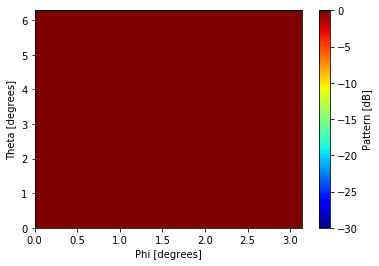

In [0]:
## Plot in 2D ##

theta, phi = np.linspace(0, 2 * np.pi, 40), np.linspace(0, np.pi, 40)
theta2d, phi2d = np.meshgrid(theta, phi)

# Control plot dynamic range
pltmax = 0
pltmin = -30

# Create the 2D colormap
plt.figure()
plt.pcolor(phi2d, theta2d, np.nan_to_num(P_n(theta2d, phi2d)), vmin=pltmin, vmax=pltmax, cmap="jet")
plt.xlabel("Phi [degrees]")
plt.ylabel("Theta [degrees]")
plt.colorbar(label="Pattern [dB]")
plt.show()

In [0]:
theta, phi = np.linspace(0, 2 * np.pi, 40), np.linspace(0, np.pi, 40)
THETA, PHI = np.meshgrid(theta, phi)
R = np.cos(PHI**2)
X = R * np.sin(PHI) * np.cos(THETA)
Y = R * np.sin(PHI) * np.sin(THETA)
Z = R * np.cos(PHI)

# fourth dimention - colormap
# create colormap according to R-value
color_dimension = R # change to desired fourth dimension
minn, maxx = color_dimension.min(), color_dimension.max()
norm = matplotlib.colors.Normalize(minn, maxx)
m = plt.cm.ScalarMappable(norm=norm, cmap='jet')
m.set_array([])
fcolors = m.to_rgba(color_dimension)

fig = plt.figure()
ax = fig.gca(projection='3d')
pattern = ax.plot_surface(
    X, Y, Z, rstride=1, cstride=1, facecolors=fcolors, vmin=minn, vmax=maxx,
    shade=False, alpha=0.5, linewidth=0, antialiased=False)
fig.colorbar(pattern, shrink=0.5, aspect=5)
plt.show()

'''
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
plot = ax.plot_surface(
    X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('jet'),
    linewidth=0, antialiased=False, alpha=0.5)
plt.show()
'''

'''
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X,Y,Z, rstride=1, cstride=1, facecolors=fcolors, vmin=minn, vmax=maxx, shade=False)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
fig.canvas.show()
'''

In [0]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# domains
x = np.logspace(-1.,np.log10(5),50) # [0.1, 5]
y = np.linspace(6,9,50)             # [6, 9]
z = np.linspace(-1,1,50)            # [-1, 1]

# convert to 2d matrices
Z = np.outer(z.T, z)        # 50x50
X, Y = np.meshgrid(x, y)    # 50x50

# fourth dimention - colormap
# create colormap according to x-value (can use any 50x50 array)
color_dimension = X # change to desired fourth dimension
minn, maxx = color_dimension.min(), color_dimension.max()
norm = matplotlib.colors.Normalize(minn, maxx)
m = plt.cm.ScalarMappable(norm=norm, cmap='jet')
m.set_array([])
fcolors = m.to_rgba(color_dimension)

# plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X,Y,Z, rstride=1, cstride=1, facecolors=fcolors, vmin=minn, vmax=maxx, shade=False)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
fig.canvas.show()